# ***SIP LAB 5***
Krisha Chemburkar

I012

B1 Batch

Semester IV

BTech AI


# ***Aim:***
    a. Classify the test images as low contrast, high contrast, dark and bright images by plotting their histograms.

    b. Implement histogram equalization on the low contrast, dark and bright images

Examine the effect of equalization on the test images by comparing the histograms of the test images with the equalized images.

## ***Classifying the images by plotting their histograms***

In [1]:
#IMPORTING ALL NEEDED LIBRARIES
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#READING ALL THE IMAGES REQUIRED
img1 = cv2.imread('/content/image1.tif',0) #reading the image
img2 = cv2.imread('/content/image2.tif',0) #reading the image
img3 = cv2.imread("/content/image3.tif",0) #reading the image
img4 = cv2.imread("/content/image4.png",0) #reading the image

In [40]:
#MAKING A FUNCTION TO 
def hists(img):
  (val,freq) = np.unique(img,return_counts=True)    #stores the value and frequency of the intensity
  res = {val[i]: freq[i] for i in range(len(val))}    #turn it into a dictionary
  #adding the values not available as 0
  for i in range(256): 
    if i not in res:
      res[i]=0
      
  return res

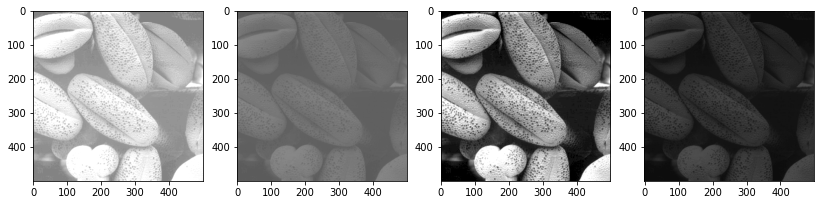

In [4]:
#PLOTTING THE IMAGES 
plt.figure(figsize=(14,14))
plt.subplot(1,4,1)
plt.imshow(img1, cmap="gray", vmin = 0, vmax=255)

plt.subplot(1,4,2)
plt.imshow(img2,cmap ='gray', vmin = 0, vmax=255)

plt.subplot(1,4,3)
plt.imshow(img3,cmap ='gray', vmin = 0, vmax=255)

plt.subplot(1,4,4)
plt.imshow(img4,cmap ='gray', vmin = 0, vmax=255)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


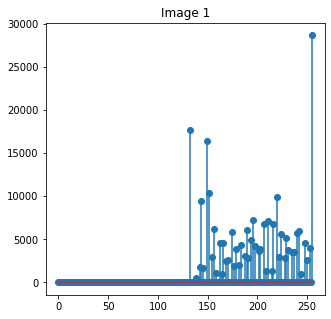

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


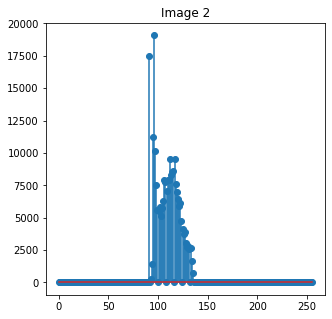

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [71]:
#PLOTTING 1ST AND THE 2ND IMAGE
plt.figure(figsize=(8,6))
val1=hists(img1)
plt.title("Image 1")
plt.stem(val1.keys(),val1.values())
plt.show()

plt.figure(figsize=(8,6))
val2=hists(img2)
plt.title("Image 2")
plt.stem(val2.keys(),val2.values())
plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


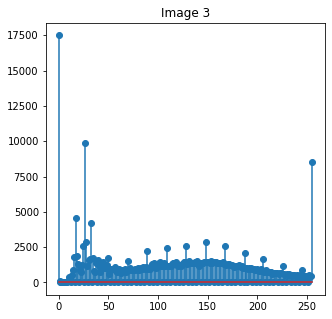

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


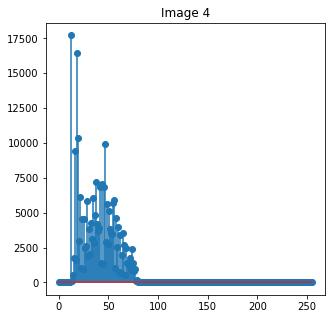

In [72]:
#PLOTTING THE 3RD AND 4TH IMAGE
plt.figure(figsize=(8,6))
val3=hists(img3)
plt.title("Image 3")
plt.stem(val3.keys(),val3.values())
plt.show()

plt.figure(figsize=(8,6))
val4=hists(img4)
plt.title("Image 4")
plt.stem(val4.keys(),val4.values())
plt.show()

## ***Histogram Equilization***

In [7]:
m,n=img4.shape #saving the image's shape in m and n

In [53]:
rk=[i for i in range(256)] #list of original intensities
nk=[val4[j] for j in range(256)]  #frequency of the particular intensity


In [56]:
tf = sum(nk)  #sum of all the frequency
pk = []   #probability of each intensity level occuring in the image (sum = 1)
cdf = []  #cumulative frequency of intensities 
sk = []   #sk = cdf*(l-1) new intensity value 
l = 256   #max intensity
s = 0
for i in nk:
  a = i/tf
  pk.append(a)
  s+=a
  cdf.append(s)
  sk.append(s*(l-1))
r = [round(i) for i in sk]  #rounded values of sk


In [58]:
dict = {"rk":rk, "nk":nk, "pk":pk, "cdf":cdf, "sk":sk, "round sk":r} #forming a dictionary to make a database
df = pd.DataFrame(dict)

In [62]:
df

,rk,nk,pk,cdf,sk,round sk
0,0,0,0.0,0.0,0.0,0
1,1,0,0.0,0.0,0.0,0
2,2,0,0.0,0.0,0.0,0
3,3,0,0.0,0.0,0.0,0
4,4,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...
251,251,0,0.0,1.0,255.0,255
252,252,0,0.0,1.0,255.0,255
253,253,0,0.0,1.0,255.0,255
254,254,0,0.0,1.0,255.0,255


In [65]:
imgE4= np.zeros((m,n),dtype=int) #making an array of size the same as img4 to apply equilization
for i in range(m):
  for j in range(n):
    #changing the old intensity values into the new ones
    temp= img4[i,j]   
    imgE4[i,j]= r[temp]

imgE4=imgE4.astype('int')

In [67]:
img4

array([[13, 13, 13, ..., 36, 36, 33],
       [13, 13, 13, ..., 35, 35, 31],
       [13, 13, 13, ..., 29, 29, 26],
       ...,
       [19, 13, 13, ..., 58, 56, 56],
       [20, 15, 13, ..., 56, 56, 53],
       [22, 18, 13, ..., 55, 55, 49]], dtype=uint8)

In [68]:
imgE4

array([[ 18,  18,  18, ..., 115, 115, 103],
       [ 18,  18,  18, ..., 112, 112,  97],
       [ 18,  18,  18, ...,  91,  91,  80],
       ...,
       [ 49,  18,  18, ..., 219, 213, 213],
       [ 59,  19,  18, ..., 213, 213, 198],
       [ 68,  32,  18, ..., 207, 207, 182]])

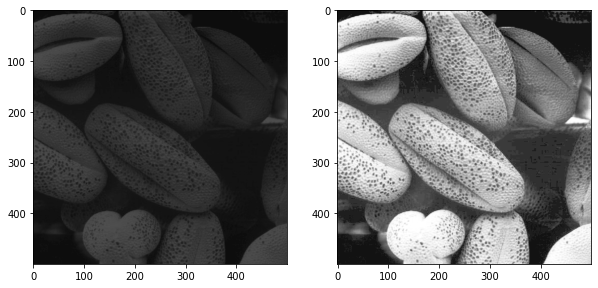

In [69]:
#PLOTTING IMAGE 4 AND ITS EQUILIZED IMAGE
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img4, cmap="gray", vmin = 0, vmax=255)

plt.subplot(1,2,2)
plt.imshow(imgE4,cmap ='gray', vmin = 0, vmax=255)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


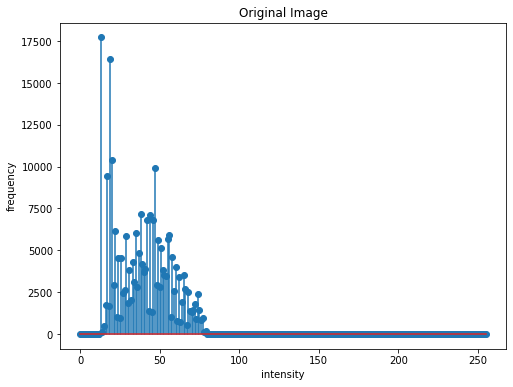

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


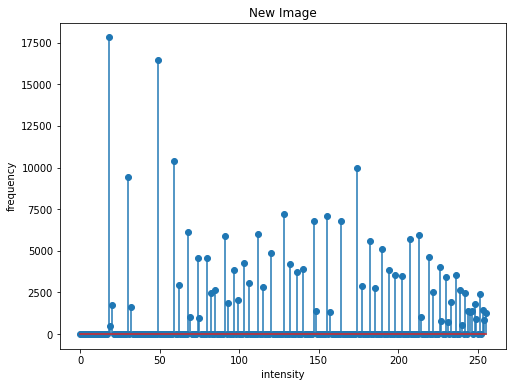

Text(0, 0.5, 'intensity in the new image')

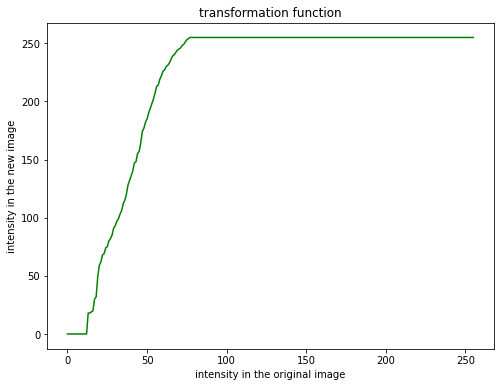

In [83]:
#PLOTTING HISTOGRAM OF BOTH THE IMAGES
plt.figure(figsize=(8,6))
plt.title("Original Image")
plt.xlabel("intensity")
plt.ylabel("frequency")
plt.stem(val4.keys(),val4.values())
plt.show()

plt.figure(figsize=(8,6))
valE4=hists(imgE4)
plt.stem(valE4.keys(),valE4.values())
plt.title("New Image")
plt.xlabel("intensity")
plt.ylabel("frequency")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(rk,r, "-g")
plt.title("transformation function")
plt.xlabel("intensity in the original image")
plt.ylabel("intensity in the new image")

# ***Conclusion:***
In this experiment we plot the histograms of low contrast, high contrast, dark and bright images and we see the difference in each of them. 

Looking at the histograms we see that:

    a. Image 1 is a bright image since majority pixel values have high intensities
    b. Image 2 is a low contrast image since the intensity values are all concentrated in the middle
    c. Image 3 is a high contrast image since the intensity values are spread out
    d. Image 4 is a dark image since majority pixel values have low intensities

We also apply histogram equilization on image 4 to see the changes that occur. Image 4 is a dark image since majority pixel values have low intensities. Once we apply the histogram equilization we see the that intensity values are all spread our throughout the range.